In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Claim Policy_ECA.csv')

In [3]:
df.head()

,Claim_ID,Policy_No,Name,Planned,Actual,Created,Amount,Paid,Category,Terms,Region,Type
0,2.928510e+09,300764795,Roger Torres,17/1/2021,18/1/2021 0:00,20210112,3072.349,Yes,AT,AD23,LOC,L001
1,2.928511e+09,300434439,Jason Jones,5/2/2021,16/1/2021 0:00,20210130,910.944,Yes,AT,EC05,LOC,L001
2,2.928517e+09,300769623,Robert Martin,18/1/2021,14/1/2021 0:00,20210113,567.936,Yes,AT,AB27,LOC,L001
3,2.928517e+09,300794332,Stacy Anderson,15/1/2021,18/1/2021 0:00,20210110,181.651,Yes,AT,AE14,LOC,L001
4,2.928518e+09,300792283,Mr. Adam Whitaker III,5/2/2021,8/2/2021 0:00,20210131,238.74,Yes,AT,EC05,LOC,L001


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24213 entries, 0 to 24212
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Claim_ID   24208 non-null  float64
 1   Policy_No  24213 non-null  int64  
 2   Name       24213 non-null  object 
 3   Planned    24213 non-null  object 
 4   Actual     22536 non-null  object 
 5   Created    24213 non-null  int64  
 6   Amount     24213 non-null  object 
 7   Paid       24213 non-null  object 
 8   Category   24213 non-null  object 
 9   Terms      24213 non-null  object 
 10  Region     24213 non-null  object 
 11  Type       24213 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.2+ MB


In [5]:
df.shape

(24213, 12)

# Question 1

In [6]:
df.isnull().sum()

Claim_ID        5
Policy_No       0
Name            0
Planned         0
Actual       1677
Created         0
Amount          0
Paid            0
Category        0
Terms           0
Region          0
Type            0
dtype: int64

In [7]:
#Few columns are of no use for us lets just drop them
df1 = df.drop(['Claim_ID', 'Policy_No', 'Created'], axis = 1, inplace=True)

In [8]:
df.shape

(24213, 9)

In [9]:
df.head()

,Name,Planned,Actual,Amount,Paid,Category,Terms,Region,Type
0,Roger Torres,17/1/2021,18/1/2021 0:00,3072.349,Yes,AT,AD23,LOC,L001
1,Jason Jones,5/2/2021,16/1/2021 0:00,910.944,Yes,AT,EC05,LOC,L001
2,Robert Martin,18/1/2021,14/1/2021 0:00,567.936,Yes,AT,AB27,LOC,L001
3,Stacy Anderson,15/1/2021,18/1/2021 0:00,181.651,Yes,AT,AE14,LOC,L001
4,Mr. Adam Whitaker III,5/2/2021,8/2/2021 0:00,238.74,Yes,AT,EC05,LOC,L001


In [10]:
import re
col_list = ['Name', 'Planned', 'Actual', 'Amount', 'Paid', 'Category', 'Terms', 'Region', 'Type']
for col in col_list:
    unkn_count = df[col].str.count(re.escape("Unkn")).sum()
    q_count = df[col].str.count(re.escape("???")).sum()
    print(f"Column {col}: {unkn_count} 'Unkn' values, {q_count} '???' values")

Column Name: 0 'Unkn' values, 0 '???' values
Column Planned: 0 'Unkn' values, 0 '???' values
Column Actual: 0.0 'Unkn' values, 0.0 '???' values
Column Amount: 0 'Unkn' values, 0 '???' values
Column Paid: 0 'Unkn' values, 0 '???' values
Column Category: 0 'Unkn' values, 0 '???' values
Column Terms: 4 'Unkn' values, 3 '???' values
Column Region: 0 'Unkn' values, 0 '???' values
Column Type: 0 'Unkn' values, 0 '???' values


Out of all Columns only variable "Terms" has 4 "Unkn" and 3 "???" in the column.

# Question 2

In [11]:
index_to_drop = df[df['Terms']=='Unkn'].index
print(index_to_drop)

Int64Index([2730, 2732, 3492, 6329], dtype='int64')


In [12]:
index_to_drop = df[df['Terms']=='???'].index
print(index_to_drop)

Int64Index([2729, 2731, 6177], dtype='int64')


In [13]:
mode = df.Terms.mode()[0]
df['Terms'] = df['Terms'].replace('Unkn', mode)
df['Terms'] = df['Terms'].replace('???', mode)

In [14]:
col_list = ['Name', 'Planned', 'Actual', 'Amount', 'Paid', 'Category', 'Terms', 'Region', 'Type']
for col in col_list:
    unkn_count = df[col].str.count(re.escape("Unkn")).sum()
    q_count = df[col].str.count(re.escape("???")).sum()
    print(f"Column {col}: {unkn_count} 'Unkn' values, {q_count} '???' values")

Column Name: 0 'Unkn' values, 0 '???' values
Column Planned: 0 'Unkn' values, 0 '???' values
Column Actual: 0.0 'Unkn' values, 0.0 '???' values
Column Amount: 0 'Unkn' values, 0 '???' values
Column Paid: 0 'Unkn' values, 0 '???' values
Column Category: 0 'Unkn' values, 0 '???' values
Column Terms: 0 'Unkn' values, 0 '???' values
Column Region: 0 'Unkn' values, 0 '???' values
Column Type: 0 'Unkn' values, 0 '???' values


We treated the missing values by replacing them with the mode of column. Since missing values were very less in number thats why replacing them with mode will not overfit, or underfit the processing.

# Question 3

First Data preparation task is to work with real null values other than Unkna and ??? in data set

In [15]:
df.isnull().sum()

Name           0
Planned        0
Actual      1677
Amount         0
Paid           0
Category       0
Terms          0
Region         0
Type           0
dtype: int64

In [16]:
df2 = df.dropna()
df2.tail(5)

,Name,Planned,Actual,Amount,Paid,Category,Terms,Region,Type
24208,Daniel Davis,30/3/2021,27/12/2021 0:00,188.4,Yes,XT,CB91,FVS,O001
24209,Jennifer Thomas,18/3/2021,31/5/2021 0:00,460.8,Yes,XT,CB91,FVS,O001
24210,Amber Newton,21/3/2021,23/5/2021 0:00,120.735,Yes,XT,CB91,FVS,O001
24211,Marcus Hernandez,1/4/2021,22/5/2021 0:00,591.12,Yes,XT,CB91,FVS,O001
24212,James Fernandez,4/4/2021,8/5/2021 0:00,837,Yes,XT,CB91,FVS,O001


In [17]:
df2.isnull().sum()

Name        0
Planned     0
Actual      0
Amount      0
Paid        0
Category    0
Terms       0
Region      0
Type        0
dtype: int64

Second preparation task is to work in Planned column since this will be our main focus for linear regression model

In [18]:
df2['Planned day'] = df2['Planned'].apply(lambda x: x.split('/')[0])
df2['Planned Month'] = df2['Planned'].apply(lambda x: x.split('/')[1])

C:\Users\usman jalil\AppData\Local\Temp\ipykernel_20344\2836679641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Planned day'] = df2['Planned'].apply(lambda x: x.split('/')[0])
C:\Users\usman jalil\AppData\Local\Temp\ipykernel_20344\2836679641.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Planned Month'] = df2['Planned'].apply(lambda x: x.split('/')[1])


In [19]:
df2.head(5)

,Name,Planned,Actual,Amount,Paid,Category,Terms,Region,Type,Planned day,Planned Month
0,Roger Torres,17/1/2021,18/1/2021 0:00,3072.349,Yes,AT,AD23,LOC,L001,17,1
1,Jason Jones,5/2/2021,16/1/2021 0:00,910.944,Yes,AT,EC05,LOC,L001,5,2
2,Robert Martin,18/1/2021,14/1/2021 0:00,567.936,Yes,AT,AB27,LOC,L001,18,1
3,Stacy Anderson,15/1/2021,18/1/2021 0:00,181.651,Yes,AT,AE14,LOC,L001,15,1
4,Mr. Adam Whitaker III,5/2/2021,8/2/2021 0:00,238.74,Yes,AT,EC05,LOC,L001,5,2


From the planned column we observed that all the dates belong to year 2021 so there is no point working on this we are more interested in date and month thats why we extracted them separately.

Third preparation task is to work in Actual column since this will also be our main focus for linear regression model

In [20]:
df2['Actual Day'] = df2['Actual'].apply(lambda x: x.split('/')[0])
df2['Actual Month'] = df2['Actual'].apply(lambda x: x.split('/')[1])

C:\Users\usman jalil\AppData\Local\Temp\ipykernel_20344\2764660008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Actual Day'] = df2['Actual'].apply(lambda x: x.split('/')[0])
C:\Users\usman jalil\AppData\Local\Temp\ipykernel_20344\2764660008.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Actual Month'] = df2['Actual'].apply(lambda x: x.split('/')[1])


In [21]:
df2.head(5)

,Name,Planned,Actual,Amount,Paid,Category,Terms,Region,Type,Planned day,Planned Month,Actual Day,Actual Month
0,Roger Torres,17/1/2021,18/1/2021 0:00,3072.349,Yes,AT,AD23,LOC,L001,17,1,18,1
1,Jason Jones,5/2/2021,16/1/2021 0:00,910.944,Yes,AT,EC05,LOC,L001,5,2,16,1
2,Robert Martin,18/1/2021,14/1/2021 0:00,567.936,Yes,AT,AB27,LOC,L001,18,1,14,1
3,Stacy Anderson,15/1/2021,18/1/2021 0:00,181.651,Yes,AT,AE14,LOC,L001,15,1,18,1
4,Mr. Adam Whitaker III,5/2/2021,8/2/2021 0:00,238.74,Yes,AT,EC05,LOC,L001,5,2,8,2


Now we will drop the Planned and Actual date column because they are no use for us now.

In [22]:
df3 = df2.drop(['Planned', 'Actual'], axis = 1)

In [23]:
df3.head(5)

,Name,Amount,Paid,Category,Terms,Region,Type,Planned day,Planned Month,Actual Day,Actual Month
0,Roger Torres,3072.349,Yes,AT,AD23,LOC,L001,17,1,18,1
1,Jason Jones,910.944,Yes,AT,EC05,LOC,L001,5,2,16,1
2,Robert Martin,567.936,Yes,AT,AB27,LOC,L001,18,1,14,1
3,Stacy Anderson,181.651,Yes,AT,AE14,LOC,L001,15,1,18,1
4,Mr. Adam Whitaker III,238.74,Yes,AT,EC05,LOC,L001,5,2,8,2


# Question 4

In [24]:
df3.columns

Index(['Name', 'Amount', 'Paid', 'Category', 'Terms', 'Region', 'Type',
       'Planned day', 'Planned Month', 'Actual Day', 'Actual Month'],
      dtype='object')

Category
AT    9993.246
XT         837
Name: Amount, dtype: object


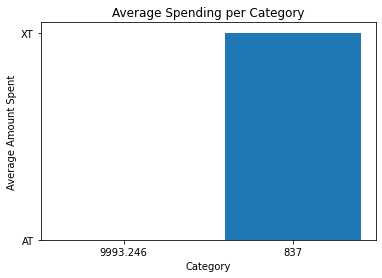

In [25]:
# Group the data by category and calculate the mean amount spent in each category
avg_spending_per_category = df3.groupby('Category')['Amount'].max()

# Print the result
print(avg_spending_per_category)

plt.bar(avg_spending_per_category.values, avg_spending_per_category.index)
plt.title('Average Spending per Category')
plt.xlabel('Category')
plt.ylabel('Average Amount Spent')
plt.show()

Planned Month
1      996.226
10    9993.246
11      999.24
12     999.772
2      998.553
3      999.093
4     9972.151
5     9986.688
6      9987.16
7      999.063
8     9980.525
9      999.011
Name: Amount, dtype: object


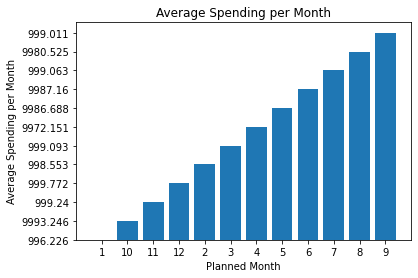

In [26]:
# Group the data by category and calculate the mean amount spent in each category
avg_spending_per_category = df3.groupby('Planned Month')['Amount'].max()

# Print the result
print(avg_spending_per_category)

plt.bar(avg_spending_per_category.index, avg_spending_per_category.values)
plt.title('Average Spending per Month')
plt.xlabel('Planned Month')
plt.ylabel('Average Spending per Month')
plt.show()

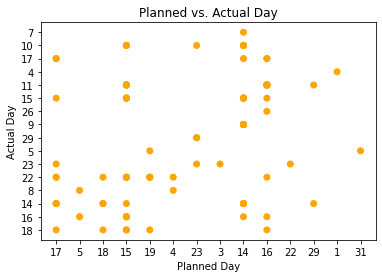

In [27]:
df4 = df3.copy()
df_subset = df4.head(100)

# Create a list of colors for the planned and actual days
planned_day_color = 'blue'
actual_day_color = 'orange'
colors = [planned_day_color if d == 'Planned day' else actual_day_color for d in df_subset['Actual Day']]

# Plot the scatter plot
plt.scatter(df_subset['Planned day'], df_subset['Actual Day'], c=colors)
plt.title('Planned vs. Actual Day')
plt.xlabel('Planned Day')
plt.ylabel('Actual Day')
plt.show()

# Question 5

In [28]:
df3.head()

,Name,Amount,Paid,Category,Terms,Region,Type,Planned day,Planned Month,Actual Day,Actual Month
0,Roger Torres,3072.349,Yes,AT,AD23,LOC,L001,17,1,18,1
1,Jason Jones,910.944,Yes,AT,EC05,LOC,L001,5,2,16,1
2,Robert Martin,567.936,Yes,AT,AB27,LOC,L001,18,1,14,1
3,Stacy Anderson,181.651,Yes,AT,AE14,LOC,L001,15,1,18,1
4,Mr. Adam Whitaker III,238.74,Yes,AT,EC05,LOC,L001,5,2,8,2


In [29]:
df3['Planned day'] = pd.to_numeric(df3['Planned day'])
df3['Actual Day'] = pd.to_numeric(df3['Actual Day'])

In [30]:
df3['Delay'] = abs((df3['Actual Day'] - df3['Planned day']))

In [31]:
df3

,Name,Amount,Paid,Category,Terms,Region,Type,Planned day,Planned Month,Actual Day,Actual Month,Delay
0,Roger Torres,3072.349,Yes,AT,AD23,LOC,L001,17,1,18,1,1
1,Jason Jones,910.944,Yes,AT,EC05,LOC,L001,5,2,16,1,11
2,Robert Martin,567.936,Yes,AT,AB27,LOC,L001,18,1,14,1,4
3,Stacy Anderson,181.651,Yes,AT,AE14,LOC,L001,15,1,18,1,3
4,Mr. Adam Whitaker III,238.74,Yes,AT,EC05,LOC,L001,5,2,8,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
24208,Daniel Davis,188.4,Yes,XT,CB91,FVS,O001,30,3,27,12,3
24209,Jennifer Thomas,460.8,Yes,XT,CB91,FVS,O001,18,3,31,5,13
24210,Amber Newton,120.735,Yes,XT,CB91,FVS,O001,21,3,23,5,2
24211,Marcus Hernandez,591.12,Yes,XT,CB91,FVS,O001,1,4,22,5,21


In [32]:
columns = ['Amount', 'Category', 'Region', 'Type', 'Delay']
df3 = pd.get_dummies(df3[columns], columns=['Category', 'Region', 'Type'])

In [34]:
from sklearn.model_selection import train_test_split

X = df3.drop(['Delay', 'Amount'], axis=1)
y = df3['Delay']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

##### Summary of Modeling Approach

The steps taken to apply a linear regression model to predict the delay in days between the planned and actual date for processing claims involved first loading the dataset into a pandas DataFrame. Then, the data was pre-processed by converting the 'Planned day' and 'Actual Day' columns to numeric data types, as they were initially in string format. Next, a linear regression model was fit to the data using scikit-learn's LinearRegression class. The model's performance was evaluated using the mean squared error and R2 score metrics.

# Question 6 

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R2 Score:', r2)


Mean Squared Error: 9.17636915940278e+23
R2 Score: -1.959661084713111e+22


##### Future Add-ons

The results proved that despite alot of pre-processing and training and testing and refining of data to convert it into first normal form, Data behavior is highly non-linear and linear Regression is not best fit choice for predicting delay in days.